IMPLEMENTING CNN FOR IMAGE CLASSIFICATION OF FASHION_MNIST DATA IN KERAS.

In [40]:
# Importing the required libraries for keras and the dataset fashion_mnist.
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


DATA LOADING FROM KERAS 

In [43]:
# loading the data and putting it into Train and Test as tuples.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

data=fashion_mnist.load_data()

DATA EXPLORATION AND UNDERSTANDING

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

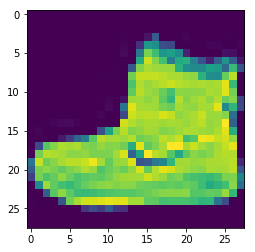

In [35]:
# Displaying the first value in X_train which is an image having pixel values 0 to 255.
print(X_train[0])

import matplotlib.pyplot as plt

plt.imshow(X_train[0])

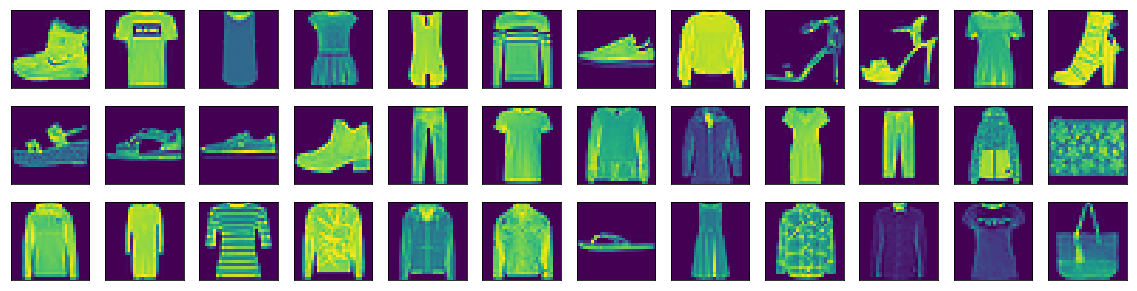

In [37]:
# Displaying the first 36 images of the training data which has fashion apparel images stored as pixel values in matrix.
fig= plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [24]:
# Dimensions of train and test data using shape.
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [25]:
# Reshaping the train and test. 
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [45]:
# Checking for number of categories for classification
categories = np.unique(Y_train)
len(categories)


10

So there are 10 labels/categories in the fashion_mnist dataset.

PREPROCESSING THE DATA

In [47]:
# Encoding categorical values.
Y_train= keras.utils.to_categorical(Y_train)
Y_test= keras.utils.to_categorical(Y_test)

In [ ]:
SETTING UP THE CNN MODEL AND ARCHITECTURE

In [48]:
# Defining the model architecture

model = Sequential()

#Adding a 2D convolutional layer of 64 nodes with kernel size 3x3 and activation function best suited at this stage 'RELU'.
model.add(Conv2D(64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) 

#Adding a 2D Maxpooling layer which picks up the maximum value from the regions of incoming output of Convolutional layer. 
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

#Adding another 2D of 32 nodes ,kernel size 3x3 and activation function 'RELU'.
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Adding another 2D Maxpooling layer which picks up the maximum value from the regions of incoming o/p of 2nd Convolutional layer. 

model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

#Adding a dense layer. This layer is a regular fully-connected NN layer.
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

#This layer Flattens the input. Does not affect the batch size.
model.add(Flatten())

#This is the final layer (fully connected)
model.add(Dense(10, activation='softmax'))

COMPILING AND SUMMARIZING THE MODEL

In [49]:
# Compiling and summary of model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 5, 5, 32)          1056      
__________

In [ ]:
FITTING THE CNN MODEL ON THE TRAINING DATA

In [30]:
model_cnn= model.fit(X_train, Y_train, epochs=5, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 173s 4ms/step - loss: 1.4072 - acc: 0.7174 - val_loss: 0.4770 - val_acc: 0.8213
Epoch 2/5
48000/48000 [==============================] - 175s 4ms/step - loss: 0.5230 - acc: 0.8094 - val_loss: 0.4141 - val_acc: 0.8508
Epoch 3/5
48000/48000 [==============================] - 183s 4ms/step - loss: 0.4728 - acc: 0.8271 - val_loss: 0.3969 - val_acc: 0.8525
Epoch 4/5
48000/48000 [==============================] - 189s 4ms/step - loss: 0.4505 - acc: 0.8341 - val_loss: 0.4007 - val_acc: 0.8470
Epoch 5/5
48000/48000 [==============================] - 154s 3ms/step - loss: 0.4356 - acc: 0.8405 - val_loss: 0.3819 - val_acc: 0.8563


In [ ]:
METRICS EVALUATION OF THE CLASSIFICATION

In [11]:
# loss and accuracy for train data
train_eval = model.evaluate(X_train,Y_train)
print('Train loss:', train_eval[0])
print('Train accuracy:', train_eval[1])

60000/60000 [==============================] - 34s 564us/step
Train loss: 0.394516754663
Train accuracy: 0.8543


In [12]:
# loss and accuracy for test data
test_eval = model.evaluate(X_test,Y_test)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 5s 532us/step
Test loss: 0.430296917963
Test accuracy: 0.8405


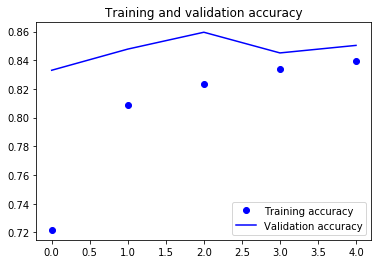

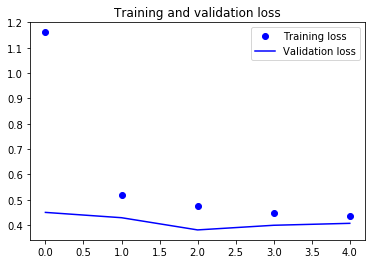

In [13]:
# Training and validation accuracy and loss plot
accuracy = model_cnn.history['acc']
val_accuracy = model_cnn.history['val_acc']
loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()